## Detection of dolphin whistles on each file & encounter

In [12]:
import os
import numpy as np
from math import floor
from lib_augment import load_and_normalize
from lib_feature import feature_whistleness

%matplotlib inline
import matplotlib.pyplot as plt

import librosa

In [2]:
deploy_path = '/home/ys587/__Data/__whistle/__whislte_30_species/__sound_48k/__whistle_oswald/STAR2003_48kHz'
species_dict = {'BD': 0, 'CD': 1, 'STR': 2, 'SPT': 3, 'SPIN': 4, 'PLT': 5, 'RT': 6,  'FKW': 7}
fs = 48000
time_reso = 0.02
hop_length = int(time_reso*fs)  #

In [3]:
encounter =  os.listdir(deploy_path)
encounter.sort()

In [4]:
encounter

['bottlenose s494',
 'bottlenose s516',
 'bottlenose s586',
 'false_killer s776',
 'longbeaked_common s482',
 'shortbeaked_common s489',
 'shortbeaked_common s627',
 'shortbeaked_common s628',
 'shortbeaked_common s631',
 'shortbeaked_common s640',
 'shortbeaked_common s792',
 'spinner s757',
 'spotted s508',
 'spotted s511',
 'striped s652',
 'striped s784',
 'striped s788']

In [5]:
# mapping folder name to species id

In [6]:
# loading the trained model
from tensorflow.keras.models import load_model
import tensorflow_addons.layers.spatial_pyramid_pooling as spp
# model_path = '/home/ys587/__Data/__whistle/__whislte_30_species/__fit_result_species/20210303_233728/STAR2000/epoch_53_valloss_0.9505_valacc_0.7552.hdf5'
model_path = '/home/ys587/__Data/__whistle/__whislte_30_species/__fit_result_species/20210305_105231/STAR2000/epoch_56_valloss_0.1945_valacc_0.7305.hdf5'
base_model = load_model(model_path)

In [7]:
feature_path = '/home/ys587/__Data/__whistle/__whislte_30_species/__dataset/20210223_augment_all_three_noise_mixed_class_balanced_min_5'
fea_files = ['oswald_STAR2003_orig.npz', 'train_oswald_no_STAR2000.npz', 'oswald_STAR2003_aug.npz']

In [8]:
ff = fea_files[0]
fea_temp = np.load(os.path.join(feature_path, ff))
print(fea_temp.files)

fea_train = fea_temp['feas_orig']
label_train = fea_temp['labels_orig']

['feas_orig', 'labels_orig']


In [9]:
fea_train = np.expand_dims(fea_train[:, :100, :], axis=3)

In [10]:
label_pred = base_model.predict(fea_train)

(array([   3.,   11.,   11.,   11.,   18.,   18.,   17.,   24.,   26.,
          23.,   23.,   35.,   25.,   32.,   39.,   31.,   52.,   90.,
         147., 1134.]),
 array([0.212331  , 0.25171444, 0.2910979 , 0.33048135, 0.3698648 ,
        0.40924823, 0.4486317 , 0.48801515, 0.5273986 , 0.56678206,
        0.6061655 , 0.64554894, 0.6849324 , 0.7243158 , 0.7636993 ,
        0.80308276, 0.8424662 , 0.88184965, 0.9212331 , 0.9606165 ,
        1.        ], dtype=float32),
 <BarContainer object of 20 artists>)

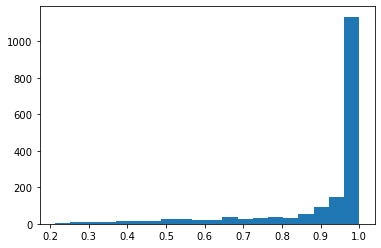

In [13]:
plt.hist(label_pred.max(axis=1), 20)

In [14]:
ff = fea_files[1]
fea_temp = np.load(os.path.join(feature_path, ff))
print(fea_temp.files)

fea_train = fea_temp['fea_train']
label_train = fea_temp['label_train']

['fea_train', 'label_train']


In [15]:
fea_train = np.expand_dims(fea_train[:, :100, :], axis=3)

In [16]:
label_pred = base_model.predict(fea_train)

(array([ 1027.,  2779.,  2666.,  2595.,  2643.,  2684.,  2709.,  2685.,
         2833.,  2821.,  2810.,  2771.,  2941.,  2877.,  3103.,  3382.,
         3982.,  5158.,  7758., 36742.]),
 array([0.13854834, 0.18162093, 0.2246935 , 0.2677661 , 0.31083867,
        0.35391125, 0.39698383, 0.4400564 , 0.483129  , 0.5262016 ,
        0.5692742 , 0.61234677, 0.65541935, 0.69849193, 0.7415645 ,
        0.7846371 , 0.8277097 , 0.87078226, 0.91385484, 0.9569274 ,
        1.        ], dtype=float32),
 <BarContainer object of 20 artists>)

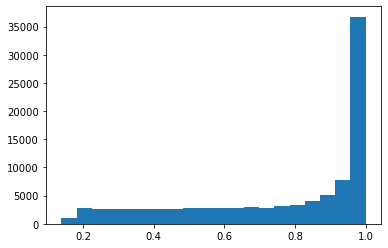

In [17]:
# all the prediction labels
plt.hist(label_pred.max(axis=1), 20)

In [18]:
# class-wise prob score distribution
label_train1 = [species_dict[ii] for ii in label_train]
label_train1 = np.array(label_train1)

(array([ 304.,  724.,  779.,  649.,  583.,  477.,  406.,  414.,  343.,
         343.,  359.,  346.,  363.,  383.,  432.,  470.,  567.,  757.,
        1128., 5201.]),
 array([3.8550678e-04, 5.0366048e-02, 1.0034659e-01, 1.5032713e-01,
        2.0030767e-01, 2.5028822e-01, 3.0026874e-01, 3.5024929e-01,
        4.0022981e-01, 4.5021036e-01, 5.0019091e-01, 5.5017143e-01,
        6.0015196e-01, 6.5013254e-01, 7.0011306e-01, 7.5009358e-01,
        8.0007416e-01, 8.5005468e-01, 9.0003520e-01, 9.5001578e-01,
        9.9999630e-01], dtype=float32),
 <BarContainer object of 20 artists>)

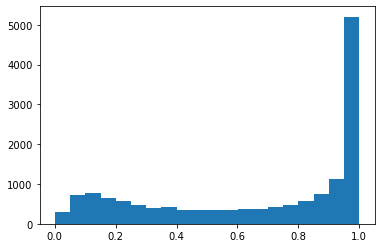

In [19]:
# BP
species_target = 0
ind_0 = np.where(label_train1 == species_target)[0]
# plt.hist(label_pred[ind_0, :].max(axis=1), 20)
plt.hist(label_pred[ind_0, species_target], 20)

(array([  97.,   80.,   87.,  122.,  117.,  127.,  112.,   93.,   95.,
         104.,  103.,  112.,  109.,  114.,  122.,  130.,  195.,  211.,
         385., 2333.]),
 array([5.4355047e-04, 5.0516374e-02, 1.0048919e-01, 1.5046202e-01,
        2.0043483e-01, 2.5040767e-01, 3.0038050e-01, 3.5035330e-01,
        4.0032613e-01, 4.5029896e-01, 5.0027180e-01, 5.5024457e-01,
        6.0021740e-01, 6.5019023e-01, 7.0016307e-01, 7.5013590e-01,
        8.0010873e-01, 8.5008150e-01, 9.0005434e-01, 9.5002717e-01,
        1.0000000e+00], dtype=float32),
 <BarContainer object of 20 artists>)

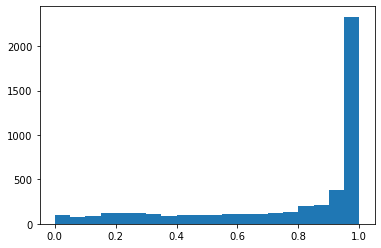

In [20]:
# CD
species_target = 1
ind_0 = np.where(label_train1 == species_target)[0]
# plt.hist(label_pred[ind_0, :].max(axis=1), 20)
plt.hist(label_pred[ind_0, species_target], 20)

(array([ 259.,  642.,  739.,  653.,  551.,  513.,  473.,  400.,  373.,
         377.,  357.,  353.,  369.,  362.,  381.,  459.,  512.,  680.,
        1080., 2995.]),
 array([5.6541956e-04, 5.0534848e-02, 1.0050428e-01, 1.5047370e-01,
        2.0044313e-01, 2.5041255e-01, 3.0038199e-01, 3.5035142e-01,
        4.0032086e-01, 4.5029026e-01, 5.0025970e-01, 5.5022913e-01,
        6.0019857e-01, 6.5016800e-01, 7.0013744e-01, 7.5010687e-01,
        8.0007625e-01, 8.5004568e-01, 9.0001512e-01, 9.4998455e-01,
        9.9995399e-01], dtype=float32),
 <BarContainer object of 20 artists>)

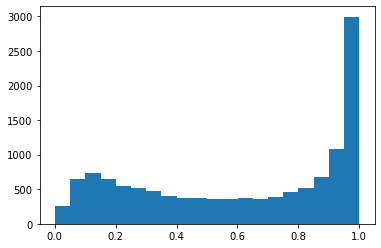

In [21]:
# STR
species_target = 2
ind_0 = np.where(label_train1 == species_target)[0]
# plt.hist(label_pred[ind_0, :].max(axis=1), 20)
plt.hist(label_pred[ind_0, species_target], 20)

(array([ 231.,  343.,  724.,  676.,  563.,  446.,  399.,  375.,  318.,
         319.,  317.,  314.,  294.,  332.,  327.,  384.,  422.,  621.,
         913., 5118.]),
 array([1.2367967e-04, 5.0117496e-02, 1.0011131e-01, 1.5010513e-01,
        2.0009895e-01, 2.5009277e-01, 3.0008659e-01, 3.5008040e-01,
        4.0007421e-01, 4.5006803e-01, 5.0006187e-01, 5.5005568e-01,
        6.0004950e-01, 6.5004331e-01, 7.0003712e-01, 7.5003093e-01,
        8.0002475e-01, 8.5001856e-01, 9.0001237e-01, 9.5000619e-01,
        1.0000000e+00], dtype=float32),
 <BarContainer object of 20 artists>)

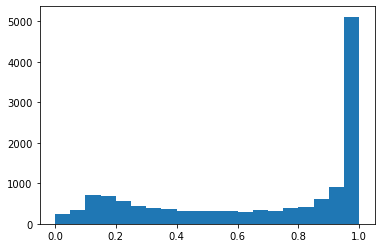

In [22]:
# SPT
species_target = 3
ind_0 = np.where(label_train1 == species_target)[0]
# plt.hist(label_pred[ind_0, :].max(axis=1), 20)
plt.hist(label_pred[ind_0, species_target], 20)

In [23]:
label_train

array(['BD', 'BD', 'BD', ..., 'STR', 'STR', 'STR'], dtype='<U4')

In [ ]:
plt.hist(label_pred.flatten(), 20)

In [ ]:
label_train1 = [species_dict[ii] for ii in label_train]

In [ ]:
label_train = np.zeros(len(label_train_list))
for ii in range(len(label_train_list)):
    label_train[ii] = species_dict[label_train_list[ii]]

In [ ]:
n1 = 30000
n2 = 30100
print(label_train[n1:n2])
label_pred = base_model.predict(fea_train[n1:n2, :])

In [ ]:
from tensorflow.keras.utils import to_categorical
plt.matshow(to_categorical(label_train1)[n1:n2, :].T)

In [ ]:
plt.matshow(label_pred.T)

In [ ]:
label_argmax = np.argmax(label_pred, axis=1)
plt.matshow(to_categorical(label_argmax).T)

In [ ]:
np.where()

In [ ]:
def prediction_enounter(encounter_folder):
    sound_files = os.listdir(encounter_folder)

    spec_feas_curr = []
    for ff in sound_files:
    # for ff in [sound_files[1]]:
        print(ff)
        samples, _ = librosa.load(os.path.join(encounter_folder, ff), sr=fs)
        print('Sound length: '+str(samples.shape[0]/fs))
        if samples.ndim >= 2:
            samples = samples[:, 0]

        for ss in range(floor((samples.shape[0]-win_size)/step_size)+1):
            samples_curr = samples[ss*step_size:ss*step_size+win_size]
            samples_curr = samples_curr - samples_curr.mean()

            spectro = librosa.feature.melspectrogram(samples_curr,sr=fs, hop_length=960)
            # spectro = librosa.feature.melspectrogram(samples_curr,sr=fs)
            spec_feas_curr.append(feature_whistleness(spectro))
    spec_feas = np.stack(spec_feas_curr)
    spec_feas = np.expand_dims(spec_feas[:, :100, :], axis=3)
    
    score = base_model.predict(spec_feas)
    
    return score

In [ ]:

# step_size = int(1.0*fs)
step_size = int(0.1*fs)
win_size = int(2.0*fs)

## Bottlenoise dolphin

In [ ]:
# run on a encounter encounter[0]
ee = encounter[0]
print(ee)
encounter_folder = os.path.join(deploy_path, ee)
score = prediction_enounter(encounter_folder)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].bar(list(species_dict.keys()), np.sqrt((score**2.0).sum(axis=0)))
ax[1].bar(list(species_dict.keys()), score.max(axis=0))

## Common dolphin

In [ ]:
ee = encounter[10]
print(ee+'\n')
encounter_folder = os.path.join(deploy_path, ee)
score = prediction_enounter(encounter_folder)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].bar(list(species_dict.keys()), np.sqrt((score**2.0).sum(axis=0)))
ax[1].bar(list(species_dict.keys()), score.max(axis=0))

## Common

In [ ]:
ee = encounter[5]
print(ee+'\n')
encounter_folder = os.path.join(deploy_path, ee)
score = prediction_enounter(encounter_folder)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].bar(list(species_dict.keys()), np.sqrt((score**2.0).sum(axis=0)))
ax[1].bar(list(species_dict.keys()), score.max(axis=0))

In [ ]:
encounter

## False killer whale

In [ ]:
ee = encounter[3]
print(ee+'\n')
encounter_folder = os.path.join(deploy_path, ee)
score = prediction_enounter(encounter_folder)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].bar(list(species_dict.keys()), np.sqrt((score**2.0).sum(axis=0)))
ax[1].bar(list(species_dict.keys()), score.max(axis=0))